***A simple Linear Classifier using Tensorflow***

In [2]:
# Imports

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
# generate random data

samples_per_class = 2000
negative_samples = np.random.multivariate_normal(
 mean=[0, 3],
 cov=[[1, 0.5],[0.5, 1]],
 size=samples_per_class)
positive_samples = np.random.multivariate_normal(
 mean=[3, 0],
 cov=[[1, 0.5],[0.5, 1]],
 size=samples_per_class)

In [4]:
# concatenate inputs and targets

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((samples_per_class, 1), dtype="float32"),
 np.ones((samples_per_class, 1), dtype="float32")))

In [5]:
np.unique(targets)

array([0., 1.], dtype=float32)

In [7]:
inputs.shape

(4000, 2)

In [8]:
targets.shape

(4000, 1)

In [35]:
np.unique(targets)

array([0., 1.], dtype=float32)

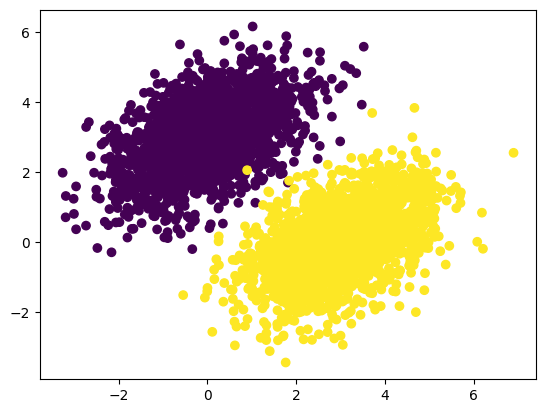

In [9]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [10]:
# define model weights and bias

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [11]:
# forward pass

def model(inputs):
    return tf.matmul(inputs, W) + b

In [12]:
# MSE loss function

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [13]:
# training step

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [14]:
# run for multiple epochs

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step+1}: {loss:.4f}")

Loss at step 1: 4.8779
Loss at step 2: 0.6769
Loss at step 3: 0.2155
Loss at step 4: 0.1512
Loss at step 5: 0.1346
Loss at step 6: 0.1244
Loss at step 7: 0.1157
Loss at step 8: 0.1078
Loss at step 9: 0.1006
Loss at step 10: 0.0940
Loss at step 11: 0.0880
Loss at step 12: 0.0826
Loss at step 13: 0.0776
Loss at step 14: 0.0731
Loss at step 15: 0.0689
Loss at step 16: 0.0651
Loss at step 17: 0.0617
Loss at step 18: 0.0585
Loss at step 19: 0.0557
Loss at step 20: 0.0531
Loss at step 21: 0.0507
Loss at step 22: 0.0485
Loss at step 23: 0.0465
Loss at step 24: 0.0447
Loss at step 25: 0.0430
Loss at step 26: 0.0415
Loss at step 27: 0.0401
Loss at step 28: 0.0389
Loss at step 29: 0.0377
Loss at step 30: 0.0367
Loss at step 31: 0.0357
Loss at step 32: 0.0349
Loss at step 33: 0.0341
Loss at step 34: 0.0334
Loss at step 35: 0.0327
Loss at step 36: 0.0321
Loss at step 37: 0.0315
Loss at step 38: 0.0310
Loss at step 39: 0.0306
Loss at step 40: 0.0302


In [15]:
# predict the estimations made by the model post training

predictions = model(inputs)
predictions[:, 0].numpy()

array([-0.05166733, -0.0211716 ,  0.08420438, ...,  0.92310417,
        1.1620299 ,  0.8584517 ], dtype=float32)

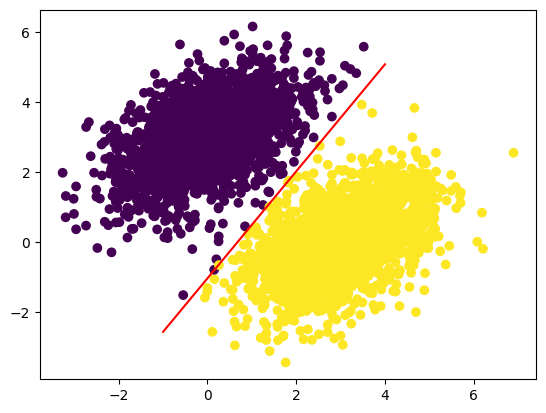

In [31]:
# plot the linear classifier with 0.5 as the separating criteria

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [36]:
# reference taken from the book: Deep learning with Python by François Chollet 2nd ed.